In [66]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt

In [67]:
#Retrieve data
nasdaq=pd.read_excel('listings.xlsx', sheet_name='nasdaq', na_values=['n/a'])

#check
nasdaq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3167 entries, 0 to 3166
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Stock Symbol           3167 non-null   object 
 1   Company Name           3167 non-null   object 
 2   Last Sale              3165 non-null   float64
 3   Market Capitalization  3167 non-null   float64
 4   IPO Year               1386 non-null   float64
 5   Sector                 2767 non-null   object 
 6   Industry               2767 non-null   object 
dtypes: float64(3), object(4)
memory usage: 173.3+ KB


In [68]:
nasdaq.Sector.nunique()

12

In [69]:
nasdaq.columns

Index(['Stock Symbol', 'Company Name', 'Last Sale', 'Market Capitalization',
       'IPO Year', 'Sector', 'Industry'],
      dtype='object')

In [70]:
#Another way to present the observations in the Sector column to find the mode
nasdaq['Sector'].value_counts()

Health Care              645
Finance                  627
Technology               433
Consumer Services        348
Capital Goods            172
Consumer Non-Durables    103
Miscellaneous             89
Consumer Durables         88
Basic Industries          78
Public Utilities          66
Energy                    66
Transportation            52
Name: Sector, dtype: int64

In [71]:
# Apply the call function on each column
# Use lambda the "anonymous function", which recieves each column as argument x
nasdaq.apply(lambda x: x.nunique())

Stock Symbol             3167
Company Name             2888
Last Sale                2313
Market Capitalization    2900
IPO Year                   40
Sector                     12
Industry                  126
dtype: int64

Steps to calculate market cap for each sector

1-Divide the market cap to convert to millions

2-Drop the original column

3-Group data by sectro

4-Calculate market cap for each sector


In [72]:
# Divde the market cap into million dollar units, make new column, drop old
# with axis=1 to remind pandas its a column, not row
nasdaq['market_cap_m'] = nasdaq['Market Capitalization'].div(1e6)
nasdaq= nasdaq.drop('Market Capitalization', axis=1)

In [73]:
# Create grouby object
nasdaq_by_sector = nasdaq.groupby('Sector')


In [74]:
# Iterate over the object in loop
for sector, data in nasdaq_by_sector:
    print (sector, data.market_cap_m.mean())

Basic Industries 724.8999338580089
Capital Goods 1511.2373727809977
Consumer Durables 839.8026066270024
Consumer Non-Durables 3104.0512055241347
Consumer Services 5582.34417481941
Energy 826.6076078547273
Finance 1044.090204799632
Health Care 1758.709196756267
Miscellaneous 3445.6559345579662
Public Utilities 2357.865315073336
Technology 10883.434213546776
Transportation 2869.660006726413


In [75]:
# Keep it simple and skip the loop
mcap_by_sector = nasdaq_by_sector.market_cap_m.mean()
mcap_by_sector

Sector
Basic Industries           724.899934
Capital Goods             1511.237373
Consumer Durables          839.802607
Consumer Non-Durables     3104.051206
Consumer Services         5582.344175
Energy                     826.607608
Finance                   1044.090205
Health Care               1758.709197
Miscellaneous             3445.655935
Public Utilities          2357.865315
Technology               10883.434214
Transportation            2869.660007
Name: market_cap_m, dtype: float64

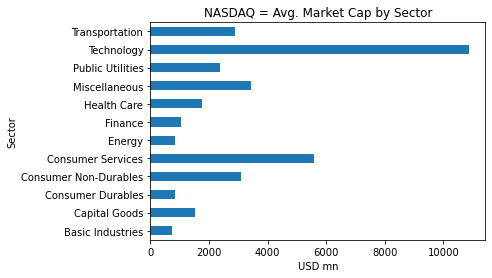

In [76]:
#Visualize the summary
title= 'NASDAQ = Avg. Market Cap by Sector'
mcap_by_sector.plot(kind='barh', title=title)
plt.xlabel('USD mn')
plt.show()

In [77]:
# Aggregate summary for all numeric columns
nasdaq_by_sector.mean()

,Last Sale,IPO Year,market_cap_m
Sector,,,
Basic Industries,21.597679,2000.766667,724.899934
Capital Goods,26.188681,2001.324675,1511.237373
Consumer Durables,24.363391,2003.222222,839.802607
Consumer Non-Durables,25.749565,2000.609756,3104.051206
Consumer Services,34.917318,2004.104575,5582.344175
Energy,15.496834,2008.034483,826.607608
Finance,29.644242,2010.321101,1044.090205
Health Care,19.462531,2009.240409,1758.709197
Miscellaneous,46.094369,2004.333333,3445.655935


You can apply the various summary statistics that you have learned about in the last chapter to a groupby object to obtain the result on a per-category basis.

This includes the .describe() function, which provides several insights all at once!

In [78]:
# Create summary statistics by sector
summary = nasdaq_by_sector.describe()

# Print the summary
print(summary)

# Unstack 
summary = summary.unstack()

# Print the summary again
print(summary)

                      Last Sale                                          \
                          count       mean         std     min      25%   
Sector                                                                    
Basic Industries           78.0  21.597679   29.009745  0.0336   2.6325   
Capital Goods             172.0  26.188681   36.596723  0.1500   4.3800   
Consumer Durables          88.0  24.363391   44.399150  0.0498   3.7500   
Consumer Non-Durables     103.0  25.749565   34.669635  0.1996   3.8800   
Consumer Services         348.0  34.917318   67.416144  0.0488   6.8250   
Energy                     65.0  15.496834   22.952420  0.1330   1.9600   
Finance                   627.0  29.644242   61.446557  0.0752  10.7350   
Health Care               645.0  19.462531   46.932855  0.0081   2.1200   
Miscellaneous              89.0  46.094369  186.951618  0.8384   3.5700   
Public Utilities           66.0  18.643705   19.307475  0.2532   5.3325   
Technology               

In [79]:
# Using agg method, which pasts a list of metrics
nasdaq_by_sector.market_cap_m.agg(['size','mean']).sort_values('size')

,size,mean
Sector,,
Transportation,52,2869.660007
Energy,66,826.607608
Public Utilities,66,2357.865315
Basic Industries,78,724.899934
Consumer Durables,88,839.802607
Miscellaneous,89,3445.655935
Consumer Non-Durables,103,3104.051206
Capital Goods,172,1511.237373
Consumer Services,348,5582.344175


In [80]:
# Calling the agg method before selecting the column, create a dictionary using the column names
nasdaq_by_sector.agg({'market_cap_m':'size', 'IPO Year':'median'})

,market_cap_m,IPO Year
Sector,,
Basic Industries,78,1996.5
Capital Goods,172,2000.0
Consumer Durables,88,2002.5
Consumer Non-Durables,103,1998.0
Consumer Services,348,2005.0
Energy,66,2011.0
Finance,627,2014.0
Health Care,645,2014.0
Miscellaneous,89,2005.0


In [81]:
# Aggregate two more categories, the result is a pandas index multi-series
nasdaq_by_sector_year = nasdaq.groupby(['Sector','IPO Year'])
nasdaq_by_sector_year.market_cap_m.mean()

Sector            IPO Year
Basic Industries  1972.0       877.240005
                  1973.0      1445.697371
                  1986.0      1396.817381
                  1988.0        24.847526
                  1990.0       434.808483
                                 ...     
Transportation    2006.0      1397.129447
                  2007.0       413.900806
                  2009.0       552.445919
                  2011.0      3711.638317
                  2013.0       125.740421
Name: market_cap_m, Length: 280, dtype: float64

In [82]:
# Select from the MultiIndex, pandas will return a series with only the second level values

mcap_sector_year =nasdaq_by_sector_year.market_cap_m.mean()
mcap_sector_year.loc['Basic Industries']

IPO Year
1972.0     877.240005
1973.0    1445.697371
1986.0    1396.817381
1988.0      24.847526
1990.0     434.808483
1991.0       9.338401
1992.0     160.416661
1993.0    1933.224036
1994.0     163.267514
1995.0     125.342784
1996.0    4087.508427
1997.0      20.754774
2008.0     331.370813
2010.0     120.296167
2011.0      35.498729
2012.0     381.796074
2013.0      22.661533
2015.0     260.075564
2016.0      81.288336
Name: market_cap_m, dtype: float64

In [83]:
# Select from the MultiIndex
mcap_sector_year.loc[['Basic Industries','Transportation']]

Sector            IPO Year
Basic Industries  1972.0       877.240005
                  1973.0      1445.697371
                  1986.0      1396.817381
                  1988.0        24.847526
                  1990.0       434.808483
                  1991.0         9.338401
                  1992.0       160.416661
                  1993.0      1933.224036
                  1994.0       163.267514
                  1995.0       125.342784
                  1996.0      4087.508427
                  1997.0        20.754774
                  2008.0       331.370813
                  2010.0       120.296167
                  2011.0        35.498729
                  2012.0       381.796074
                  2013.0        22.661533
                  2015.0       260.075564
                  2016.0        81.288336
Transportation    1986.0      1176.179710
                  1991.0      6646.778622
                  1992.0        56.074572
                  1993.0      3474.796885
       

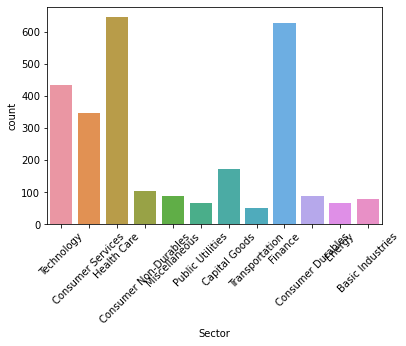

In [84]:
#Basic countplot of sector using seaborn
import seaborn as sns
sns.countplot(x='Sector', data=nasdaq)
plt.xticks(rotation=45)
plt.show()


In [85]:
# Groupby Sector size using groupby and sort_values
sector_size= nasdaq.groupby('Sector').size()
order=sector_size.sort_values(ascending=False)
order.head()

Sector
Health Care          645
Finance              627
Technology           433
Consumer Services    348
Capital Goods        172
dtype: int64

In [86]:
# Extract the index as a list 
order= order.index.tolist()
print(order)

['Health Care', 'Finance', 'Technology', 'Consumer Services', 'Capital Goods', 'Consumer Non-Durables', 'Miscellaneous', 'Consumer Durables', 'Basic Industries', 'Public Utilities', 'Energy', 'Transportation']


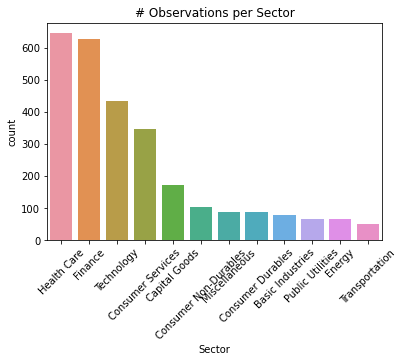

In [89]:
# Create countplot
sns.countplot(x='Sector', data=nasdaq, order=order)
plt.xticks(rotation=45)
plt.title('# Observations per Sector')
plt.show()

<ipython-input-96-eb7b4eac8a33>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recent_ipos ['IPO Year']= recent_ipos['IPO Year'].astype(int)


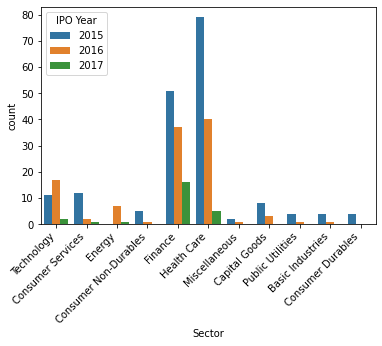

In [96]:
# Using Countplot on multiple categories

recent_ipos = nasdaq[nasdaq['IPO Year']> 2014]
recent_ipos ['IPO Year']= recent_ipos['IPO Year'].astype(int)
sns.countplot(x='Sector', hue='IPO Year', data=recent_ipos)
plt.xticks(rotation=45, ha='right')
plt.show()

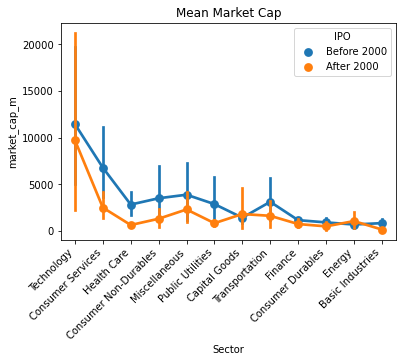

In [95]:
# Compare to a PointPlot

# Create a new variable 
nasdaq['IPO'] = nasdaq['IPO Year'].apply(lambda x: 'After 2000' if x> 2000 
                                         else 'Before 2000')
# Create the plot
sns.pointplot(x='Sector', y='market_cap_m', hue='IPO', data=nasdaq)
plt.xticks(rotation=45, ha='right'); plt.title('Mean Market Cap')
plt.show()


In [99]:
#Distributions by category, active companies only
nasdaq = nasdaq[nasdaq.market_cap_m >0]

#Remove outliers with very large market capitalization
outliers = nasdaq.market_cap_m.quantile(0.9)
nasdaq = nasdaq[nasdaq.market_cap_m < outliers]

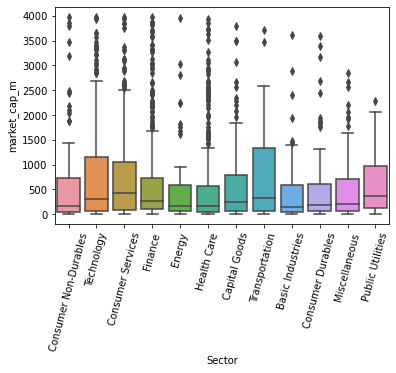

In [101]:
#Boxplot with quartiles and outliers
sns.boxplot(x='Sector',y='market_cap_m', data=nasdaq)
plt.xticks(rotation=75)
plt.show()

Boxplot outlines the distributions of the market cap for each sector. 

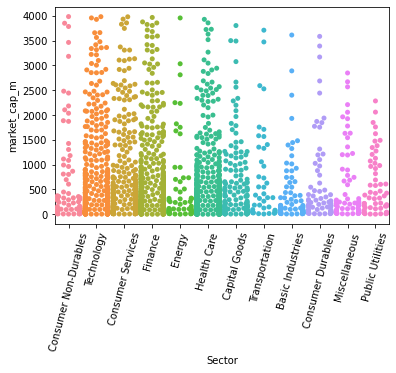

In [103]:
# Present a swarm plot 
sns.swarmplot(x='Sector', y='market_cap_m', data=nasdaq)
plt.xticks(rotation=75)
plt.show()